In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/dubai_properties.csv')

In [ ]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785.0,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45.0,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422.0,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44.0,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314.0,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31.0,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843.0,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57.0,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860.0,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65.0,Yas Island,Abu Dhabi,24.494022,54.607372


In [ ]:
# Generate summary statistics of the numerical data in the DataFrame
df.describe()

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude
count,5.854000e+03,5854.000000,5854.000000,5853.000000,5853.000000,5853.000000,5812.000000,5812.000000
mean,1.134585e+05,2.381619,3.256406,2338.711430,60.726158,58.212199,24.440180,54.553154
std,1.396115e+05,1.690541,2.001543,3206.429888,30.093353,69.738338,0.081720,0.251162
min,1.200000e+04,0.000000,1.000000,150.000000,1.666667,11.000000,23.651535,52.921301
25%,5.700000e+04,1.000000,2.000000,1000.000000,38.888889,20.000000,24.407375,54.407841
50%,8.900000e+04,2.000000,3.000000,1549.000000,56.000000,29.000000,24.466437,54.553556
75%,1.500000e+05,3.000000,4.000000,2486.000000,76.086957,60.000000,24.493598,54.607372
max,7.700000e+06,11.000000,11.000000,113500.000000,342.222222,624.000000,24.843269,55.767081


In [ ]:
# Display a concise summary of the DataFrame, including the data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854 entries, 0 to 5853
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 5854 non-null   object 
 1   Rent                    5854 non-null   int64  
 2   Beds                    5854 non-null   int64  
 3   Baths                   5854 non-null   int64  
 4   Type                    5853 non-null   object 
 5   Area_in_sqft            5853 non-null   float64
 6   Rent_per_sqft           5853 non-null   float64
 7   Rent_category           5853 non-null   object 
 8   Frequency               5853 non-null   object 
 9   Furnishing              5853 non-null   object 
 10  Purpose                 5853 non-null   object 
 11  Posted_date             5853 non-null   object 
 12  Age_of_listing_in_days  5853 non-null   float64
 13  Location                5853 non-null   object 
 14  City                    5853 non-null   

In [ ]:
# Select all rows and all columns of the DataFrame using label-based indexing
df.loc[:,:]

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785.0,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45.0,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422.0,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44.0,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314.0,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31.0,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843.0,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57.0,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860.0,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65.0,Yas Island,Abu Dhabi,24.494022,54.607372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,"Khalifa City, Abu Dhabi",50000,1,1,Apartment,999.0,50.050050,Low,Yearly,Furnished,For Rent,2024-03-19,33.0,Khalifa City,Abu Dhabi,24.420131,54.574954
5850,"C2 Al Raha Tower, Al Raha Beach, Abu Dhabi",200000,3,5,Penthouse,4500.0,44.444444,High,Yearly,Unfurnished,For Rent,2024-03-19,33.0,Al Raha Beach,Abu Dhabi,24.485931,54.600939
5851,"Ocean Terrace Residence, Marina Square, Al Ree...",65000,1,2,Apartment,956.0,67.991632,Low,Yearly,Unfurnished,For Rent,2024-03-18,34.0,Al Reem Island,Abu Dhabi,24.493598,54.407841
5852,"Soho Square Residences, Soho Square, Saadiyat ...",94999,2,3,Apartment,980.0,96.937755,Medium,Yearly,Unfurnished,For Rent,2024-03-18,34.0,Saadiyat Island,Abu Dhabi,24.545972,54.443688


In [ ]:
# Get a list of column names in the DataFrame
df.columns

Index(['Address', 'Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft',
       'Rent_per_sqft', 'Rent_category', 'Frequency', 'Furnishing', 'Purpose',
       'Posted_date', 'Age_of_listing_in_days', 'Location', 'City', 'Latitude',
       'Longitude'],
      dtype='object')

In [ ]:
# Looking for null values
df.isnull().sum()

Address                    0
Rent                       0
Beds                       0
Baths                      0
Type                       1
Area_in_sqft               1
Rent_per_sqft              1
Rent_category              1
Frequency                  1
Furnishing                 1
Purpose                    1
Posted_date                1
Age_of_listing_in_days     1
Location                   1
City                       1
Latitude                  42
Longitude                 42
dtype: int64

In [ ]:
# Keep only the rows where Latitude value is not available
df[df['Latitude'].isnull() == True]

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
21,"Bloom Central Residential, Bloom Central, Al T...",140000,3,3,Apartment,2195.0,63.781321,Medium,Yearly,Unfurnished,For Rent,2024-03-06,46.0,Al Tibbiya,Abu Dhabi,NaN,NaN
45,"Bloom Central Residential, Bloom Central, Al T...",115000,2,2,Apartment,1646.0,69.866343,Medium,Yearly,Unfurnished,For Rent,2023-02-13,433.0,Al Tibbiya,Abu Dhabi,NaN,NaN
170,"Al Manaseer, Abu Dhabi",95000,3,4,Penthouse,1649.0,57.610673,Medium,Yearly,Unfurnished,For Rent,2024-04-02,19.0,Al Manaseer,Abu Dhabi,NaN,NaN
204,"Navy Gate, Abu Dhabi",45000,1,2,Apartment,1080.0,41.666667,Low,Yearly,Unfurnished,For Rent,2024-03-28,24.0,Navy Gate,Abu Dhabi,NaN,NaN
504,"Eastern Road, Abu Dhabi",190000,5,7,Villa,4200.0,45.238095,High,Yearly,Unfurnished,For Rent,2024-02-24,57.0,Eastern Road,Abu Dhabi,NaN,NaN
524,"Bloom Central Residential, Bloom Central, Al T...",120000,2,3,Apartment,1894.0,63.357973,Medium,Yearly,Unfurnished,For Rent,2023-03-16,402.0,Al Tibbiya,Abu Dhabi,NaN,NaN
714,"Eastern Road, Abu Dhabi",70000,1,2,Apartment,900.0,77.777778,Medium,Yearly,Furnished,For Rent,2023-11-23,150.0,Eastern Road,Abu Dhabi,NaN,NaN
801,"Khalifa Park, Eastern Road, Abu Dhabi",125000,3,4,Villa,2345.0,53.304904,Medium,Yearly,Unfurnished,For Rent,2023-11-24,149.0,Eastern Road,Abu Dhabi,NaN,NaN
840,"Al Manaseer, Abu Dhabi",62000,3,3,Apartment,1378.0,44.992743,Low,Yearly,Unfurnished,For Rent,2024-03-13,39.0,Al Manaseer,Abu Dhabi,NaN,NaN
910,"Madinat Zayed Western Region, Abu Dhabi",40000,2,2,Apartment,800.0,50.000000,Low,Yearly,Unfurnished,For Rent,2023-02-15,431.0,Madinat Zayed Western Region,Abu Dhabi,NaN,NaN


In [ ]:
# Select only the rows where Longitude value is not provided
df[df['Longitude'].isnull()==True]

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
21,"Bloom Central Residential, Bloom Central, Al T...",140000,3,3,Apartment,2195.0,63.781321,Medium,Yearly,Unfurnished,For Rent,2024-03-06,46.0,Al Tibbiya,Abu Dhabi,NaN,NaN
45,"Bloom Central Residential, Bloom Central, Al T...",115000,2,2,Apartment,1646.0,69.866343,Medium,Yearly,Unfurnished,For Rent,2023-02-13,433.0,Al Tibbiya,Abu Dhabi,NaN,NaN
170,"Al Manaseer, Abu Dhabi",95000,3,4,Penthouse,1649.0,57.610673,Medium,Yearly,Unfurnished,For Rent,2024-04-02,19.0,Al Manaseer,Abu Dhabi,NaN,NaN
204,"Navy Gate, Abu Dhabi",45000,1,2,Apartment,1080.0,41.666667,Low,Yearly,Unfurnished,For Rent,2024-03-28,24.0,Navy Gate,Abu Dhabi,NaN,NaN
504,"Eastern Road, Abu Dhabi",190000,5,7,Villa,4200.0,45.238095,High,Yearly,Unfurnished,For Rent,2024-02-24,57.0,Eastern Road,Abu Dhabi,NaN,NaN
524,"Bloom Central Residential, Bloom Central, Al T...",120000,2,3,Apartment,1894.0,63.357973,Medium,Yearly,Unfurnished,For Rent,2023-03-16,402.0,Al Tibbiya,Abu Dhabi,NaN,NaN
714,"Eastern Road, Abu Dhabi",70000,1,2,Apartment,900.0,77.777778,Medium,Yearly,Furnished,For Rent,2023-11-23,150.0,Eastern Road,Abu Dhabi,NaN,NaN
801,"Khalifa Park, Eastern Road, Abu Dhabi",125000,3,4,Villa,2345.0,53.304904,Medium,Yearly,Unfurnished,For Rent,2023-11-24,149.0,Eastern Road,Abu Dhabi,NaN,NaN
840,"Al Manaseer, Abu Dhabi",62000,3,3,Apartment,1378.0,44.992743,Low,Yearly,Unfurnished,For Rent,2024-03-13,39.0,Al Manaseer,Abu Dhabi,NaN,NaN
910,"Madinat Zayed Western Region, Abu Dhabi",40000,2,2,Apartment,800.0,50.000000,Low,Yearly,Unfurnished,For Rent,2023-02-15,431.0,Madinat Zayed Western Region,Abu Dhabi,NaN,NaN


In [ ]:
# Remove the Latitude and Longitude columns from the DataFrame
df.drop(columns=['Latitude','Longitude'],inplace=True)

In [ ]:
df.isnull().sum()

Address                   0
Rent                      0
Beds                      0
Baths                     0
Type                      1
Area_in_sqft              1
Rent_per_sqft             1
Rent_category             1
Frequency                 1
Furnishing                1
Purpose                   1
Posted_date               1
Age_of_listing_in_days    1
Location                  1
City                      1
dtype: int64

In [ ]:
df.shape

(5854, 15)

**Scater plot to show the Rent vs area in sqft**

**With the help of Scatter plot we can identify the relationship between two attributes, groups of points and outliers.**


In [ ]:
# Let us compare Rent based on Area_in_sqft using scatter_plot
# Create a scatter plot

fig = px.scatter(df, x='Area_in_sqft', y='Rent', title='Rent vs Area in sqft',
                 labels={'Area_in_sqft': 'Area in sqft', 'Rent': 'Rent'})
fig.show()

**Box Plot**

The box portion of a box plot contains three lines:       

1. The first line in the top represents quartile 3 of the data points, which means that 75% of the data lies below this point;       
2. The second line in the middle represents the median value of the data points, which means that 50% of the data lies below this point;      
3. The third line in the box plot represents quartile 1 of the data points, which means that 25% of the data lies below this point;     
4. The two horizontal lines below and above the box are known as whisker lines, the above whisker represents maximum value, and the lower whisker represents minimum value.

<ipython-input-18-4a97c6fda201>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




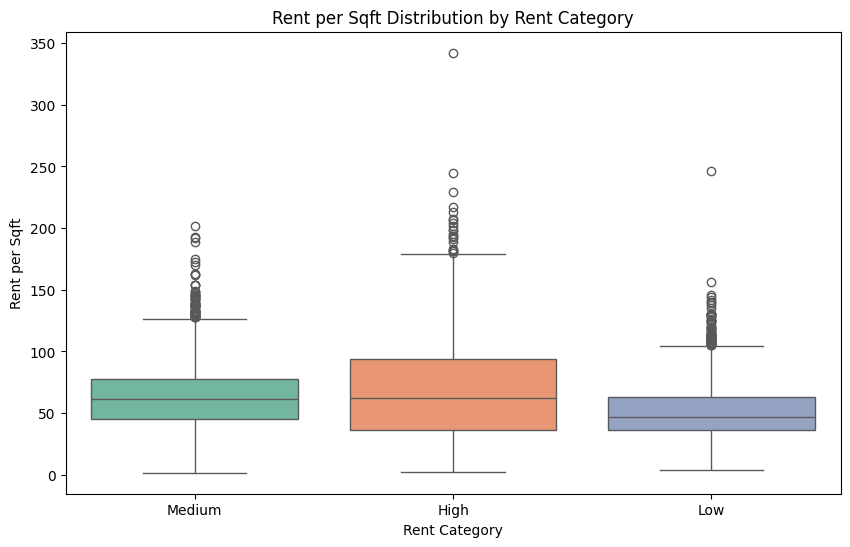

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rent_category', y='Rent_per_sqft', data=df, palette='Set2')
plt.title('Rent per Sqft Distribution by Rent Category')
plt.xlabel('Rent Category')
plt.ylabel('Rent per Sqft')
plt.show()

In [ ]:
df['Location'].unique().shape

(109,)

**A grouped bar chart is a type of graph that displays multiple sets of data using bars, where each group of bars represents a category, and each individual bar within the group represents a sub-category or data series. This visualization method allows for easy comparison of values within and between groups, making it useful for illustrating relationships and differences among multiple variables or factors simultaneously**

In [ ]:
# Aggregate the data to calculate mean rent for each Location
agg_df = df.groupby([ 'Location'])['Rent'].mean().reset_index()

# Create a grouped bar chart
fig = px.bar(agg_df, x='Location', y='Rent',  barmode='group',
             title='Average Rent by Location', labels={'Location': 'Location', 'Rent': 'Average Rent'})
fig.show()

In [ ]:
df.columns

Index(['Address', 'Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft',
       'Rent_per_sqft', 'Rent_category', 'Frequency', 'Furnishing', 'Purpose',
       'Posted_date', 'Age_of_listing_in_days', 'Location', 'City'],
      dtype='object')

In [ ]:
df['Type'].unique()

array(['Apartment', 'Penthouse', 'Villa', 'Townhouse', 'Villa Compound',
       'Residential Building', 'Residential Floor', 'Hotel Apartment'],
      dtype=object)

In [ ]:
# Aggregate the data to calculate mean rent for each type
agg_df = df.groupby([ 'Type'])['Rent'].mean().reset_index()

# Create a grouped bar chart
fig = px.bar(agg_df, x='Type', y='Rent',  barmode='group',
             title='Average Rent by Type', labels={'Type': 'Type', 'Rent': 'Average Rent'})
fig.show()

**A line plot, also known as a line chart, is a type of graph that displays data points connected by straight lines. It is commonly used to visualize trends and patterns over a continuous interval, such as time, and is particularly effective for showing how variables change over a given range or in relation to each other.**

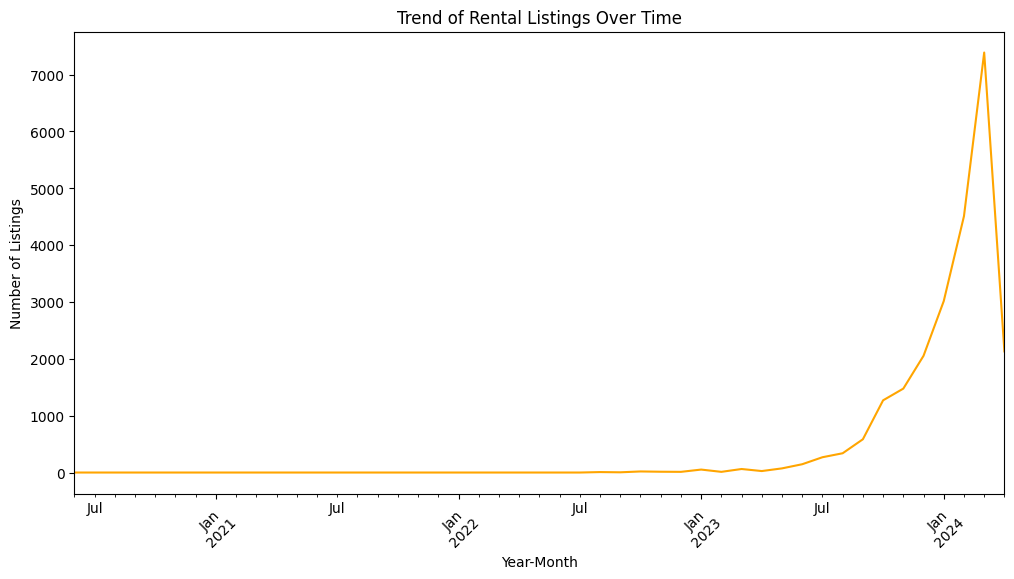

In [ ]:
# Trend of Rental Listings Over Time
df['Posted_date'] = pd.to_datetime(df['Posted_date'])
df['Year_month'] = df['Posted_date'].dt.to_period('M')

plt.figure(figsize=(12,6))
df.groupby('Year_month').size().plot(color='orange')
plt.title('Trend of Rental Listings Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Aggregate the data to calculate mean rent for whether the property is furnished or not
agg_df = df.groupby([ 'Furnishing'])['Rent'].mean().reset_index()

# Create a grouped bar chart
fig = px.bar(agg_df, x='Furnishing', y='Rent',  barmode='group',
             title='Average Rent by Furnishing', labels={'Furnishing': 'Furnishing', 'Rent': 'Average Rent'})
fig.show()

In [ ]:
mean_price_by_region = df.groupby("City")["Rent"].mean().sort_values()
mean_price_by_region

City
Ajman         69715.975309
Abu Dhabi    115261.981693
Name: Rent, dtype: float64

In [ ]:
df = df.drop(columns=['Address','Location','City','Purpose'])

In [ ]:
# Convert categorical variables to numerical using one-hot encoding (if needed)
df = pd.get_dummies(df, columns=['Type', 'Rent_category', 'Frequency', 'Furnishing'], drop_first=True)
df

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Posted_date,Age_of_listing_in_days,Type_Hotel Apartment,Type_Penthouse,Type_Residential Building,Type_Residential Floor,Type_Townhouse,Type_Villa,Type_Villa Compound,Rent_category_Low,Rent_category_Medium,Furnishing_Unfurnished
0,124000,3,4,1785.0,69.467787,2024-03-07,45.0,False,False,False,False,False,False,False,False,True,True
1,140000,3,4,1422.0,98.452883,2024-03-08,44.0,False,False,False,False,False,False,False,False,True,True
2,99000,2,3,1314.0,75.342466,2024-03-21,31.0,False,False,False,False,False,False,False,False,True,False
3,220000,3,4,3843.0,57.246942,2024-02-24,57.0,False,True,False,False,False,False,False,False,False,True
4,350000,5,7,6860.0,51.020408,2024-02-16,65.0,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23482,85000,5,7,3500.0,24.285714,2024-03-31,21.0,False,False,False,False,False,True,False,False,True,True
23483,70000,5,7,5000.0,14.000000,2024-03-31,21.0,False,False,False,False,False,True,False,False,True,True
23484,84999,5,6,3014.0,28.201393,2024-04-01,20.0,False,False,False,False,False,True,False,False,True,True
23485,36000,2,2,1813.0,19.856591,2024-04-01,20.0,False,False,False,False,False,False,False,True,False,False
